<a href="https://colab.research.google.com/github/MartinaCecchetto/DSIM/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**
1. Find the homography which describes the transformation from the <u>second</u> set of points to the <u>first</u> one
2. Apply the homography to the second image
3. Integrate the first image

In [3]:
!pip install opencv_contrib_python==3.4.2.17 --force-reinstall

     |████████████████████████████████| 30.6MB 148kB/s 
     |████████████████████████████████| 14.8MB 153kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [1]:
import cv2 as cv 
print (cv.__version__)

3.4.2


In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

#Immagini scelte

Caricamento delle due immagini scelte:

In [5]:
im1 = cv.imread('images/imm1.jpeg',0)
im2 = cv.imread('images/imm2.jpeg',0)

Text(0.5, 1.0, 'Seconda Foto')

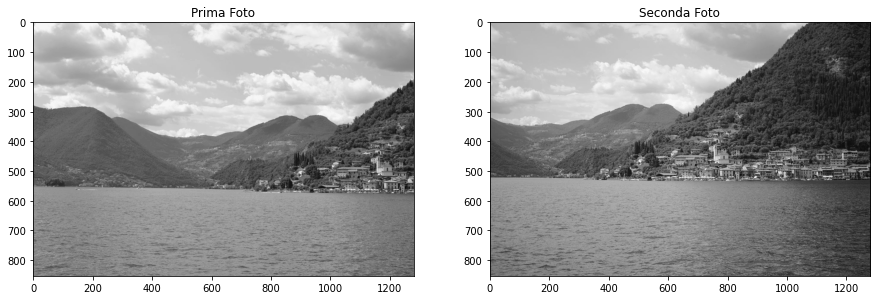

In [6]:
plt.subplot(1,2,1);plt.imshow(im1, cmap='gray');plt.title("Prima Foto")
plt.subplot(1,2,2);plt.imshow(im2, cmap='gray');plt.title("Seconda Foto")

#Estrazione dei *punti notevoli* e *matching*


In [7]:
sift = cv.xfeatures2d.SIFT_create()

In [8]:
(kps1, features1) = sift.detectAndCompute(im1, None)
(kps2, features2) = sift.detectAndCompute(im2, None)
bf = cv.BFMatcher(crossCheck=True)
matches = bf.match(features1, features2)

Visualizzazione delle corrispondenze

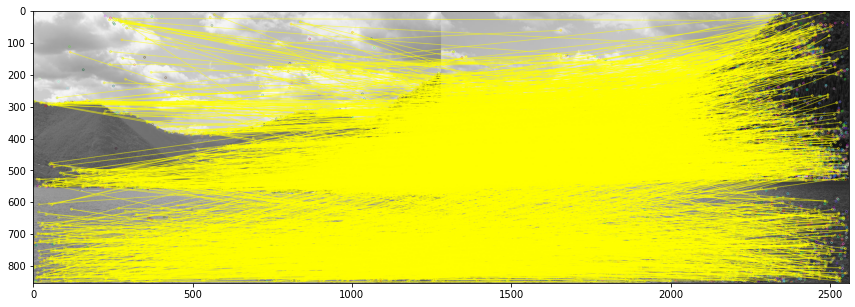

In [9]:
result = cv.drawMatches(im1, kps1, im2, kps2, matches, None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

Visualizzazione delle prime 10 corrispondenze meno distanti (più simili)

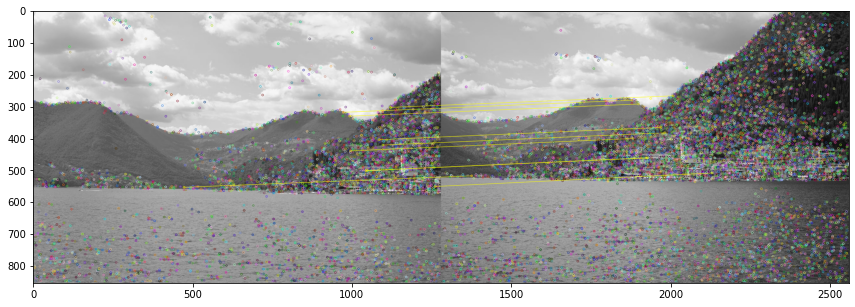

In [10]:
matches_sorted = sorted(matches, key=lambda x:x.distance)
result = cv.drawMatches(im1, kps1, im2, kps2, matches_sorted[0:10], None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

# 1. Find the homography which describes the transformation from the <u>second</u> set of points to the <u>first</u> one
Trovo omografia (trasformazione prospettica che ci dice come trasformare i pixel della seconda immagine affinchè combacino con la prima) che descrive la trasformazione tra il primo set di punti e il secondo definendo la funzione `myHomography`. `src` e `dst` sono le coordinate dei punti notevoli. `src` riferite al piano originale (quindi le coordinate dei punti dell'immagine 2), `dst` riferite al piano di destinazione (quindi le coordinate dei punti dell'immagine 1). Ad esempio: 

In [20]:
print(matches[0].queryIdx)
print(matches[0].trainIdx)

1
3581


In questo caso so che il primo match trovato è associato al punto notevole della prima immagine `kps1[1]` a cui viene associato il punto notevole della seconda immagine `kps2[3581]`. `kps[id].pt` restituisce le coordinate x,y del punto.

In [11]:
def myHomography(kps1, kps2, matches):
  src=np.array([kps2[match.trainIdx].pt for match in matches])
  dst=np.array([kps1[match.queryIdx].pt for match in matches])
  retval, mask=cv.findHomography(src,dst,cv.RANSAC,confidence=0.999)
  return retval

In [12]:
H=myHomography(kps1, kps2, matches)
H

array([[1.10381175e+00, 1.20630611e-01, 3.19530541e+02],
       [1.45836383e-02, 1.08750424e+00, 1.07017237e+01],
       [2.05086607e-05, 6.02866246e-05, 1.00000000e+00]])

# Apply the homography to the second image

Definisco la funzione `myWarp` che grazie all'utilizzo della funzione cv.perspective restituisce la seconda immagine deformata affinchè sia allineata con la prima. In `size` definisco le dimensioni dell'immagine finale.

In [13]:
def myWarp(im, H):
  size=(int(im.shape[1]+im.shape[1]/3),im.shape[0])
  dst	=	cv.warpPerspective(im, H, dsize=size)
  return dst

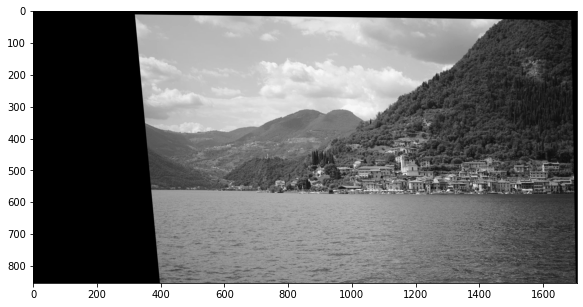

In [14]:
temp=myWarp(im2,H)
plt.imshow(temp,cmap='gray')

# Integrate the first image

Creazione della funzione `myCollage` in cui incollo sull'immagine base creata in precedenza la prima immagine a partire dai pixel in alto a sinistra.

In [15]:
def myCollage(im_base, im_new):
  im_base[0:im_new.shape[0], 0:im_new.shape[1]] = im_new
  return im_base
  

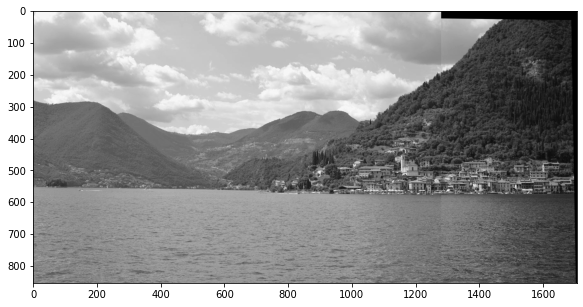

In [16]:
result=myCollage(temp,im1)
plt.imshow(result, cmap='gray')